In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import classification_report,roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import ExtraTreeClassifier as etc
from  sklearn.ensemble import RandomForestClassifier
import csv
from tqdm import tqdm, trange
# from sklearn.metrics import f1_score
import random
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as f1_score

In [77]:
ran = list(map(lambda a:a/10,range(0,41)))
# ran = range(0,1)

In [78]:
x_p = []
y_p = []
for par in tqdm(ran):
    times = 100
    f1 = 0
    for _ in range(times):
        myseed = random.randint(0,100000)
        random.seed(myseed)
        np.random.seed(myseed)

        tr_path = 'deal3_train.csv'  # path to training data
        tt_path = 'deal2_test.csv'   # path to te|sting data

        x_va = []
        y_va = []
        with open(tr_path, 'r', encoding="Big5") as fp:
                    data = list(csv.reader(fp))
                    data = np.array([list(map(float,i)) for i in data[1:]]).astype(float)
                    random.shuffle(data)
                    x_tr = [data[i][2:] for i in range(len(data)) if i % 10 <= 6]
                    y_tr = [data[i][1] for i in range(len(data)) if i % 10 <= 6]
                    x_va = [data[i][2:] for i in range(len(data)) if i % 10 > 6]
                    y_va = [data[i][1] for i in range(len(data)) if i % 10 > 6]

        # mo = GaussianNB()
        # mo = dtc(random_state=50,splitter="best",max_depth=15,min_samples_leaf=5)
        # mo = etc(random_state=50,splitter="best",max_depth=15,min_samples_leaf=5)
#         mo = RandomForestClassifier(n_estimators = 80, oob_score = True, n_jobs = -1,random_state =50,max_features = None, max_depth=18)
        mo = XGBClassifier(eta=0.3,min_child_weight=0, reg_lambda=par, objective="multi:softmax", num_class=2,use_label_encoder=False,eval_metric="rmsle")
        mo.fit(np.array(x_tr), np.array(y_tr))
        # print(i, mo.score(x_tr, y_tr))
        y_pred = mo.predict(np.array(x_tr))
        # print(f1_score(y_tr, y_pred, average='binary'))
        y_pred = mo.predict(np.array(x_va))
        # print(i, mo.score(x_va, y_va))
        # print(f1_score(y_va, y_pred, average='binary', beta=1.5)[2])
        f1 += f1_score(y_va, y_pred, average='binary', beta=1.5)[2]
        # pred = XGBClassifier()
        # pred.fit(np.array(x_tr), np.array(y_tr))
    # print(par, f1/times)
    x_p.append(par)
    y_p.append(f1/times)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [14:32<00:00, 21.27s/it]


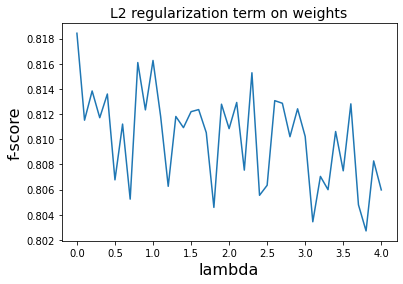

In [79]:
import matplotlib.pyplot as plt
Data_1, = plt.plot(x_p,y_p,label='x_square') #畫線
# Data_2, = plt.plot(x, y_2, 'g--*',label='x_cube') #畫線

# plt.tick_params(axis='both', labelsize=24, color='green')
# plt.legend(handles=[Data_1, Data_2])

# for a, b in zip(x_p, y_p):
#     plt.text(a, b, "{:.4f}".format(b), ha='center', va='bottom', fontsize=10)
plt.title("L2 regularization term on weights", fontsize=14) #圖表標題
plt.xlabel("lambda", fontsize=16) #x軸標題
plt.ylabel("f-score", fontsize=16) #y軸標題
plt.show() #顯示繪製的圖形

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]